## K Nearest Neighbors


Neighbors-based classification is a type of *instance-based learning* or *lazy learning*: it does not attempt to construct a general internal model (using a boundary) but simply stores instances of the training data and defers the decision to generalize until a new test instance in encountered. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

<img src="./KNN_neighbors.png"  width=50% />


### Import the libraries

Before we import the data, let's load the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics

pd.set_option('display.max_columns', 100)

### Load the data

In the previous lecture, we looked at the data on customer churn for a telecom operator. 
- We will reload the same dataset into a `DataFrame` named **"df"** using once more the function  `.read_csv()` ([Check the pandas read_csv() documentation if needed](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)). 
- To get acquainted with our data, let’s look at the first 5 entries using `.head()`
- Check the dimensionality of the data using `.shape`
- The dataset is provided in your Lab folder. 

In [2]:
# 1. Read the data from the telecom_churn.csv file (provided to you in the Lab folder) 
# using the pd.read_csv() function from pandas into a variable named "df" 
# 2. Print the dimensionality (shape) of the df DataFrame
# 3. Preview the first 5 rows of df using the function .head()

########## FILL IN YOUR SOLUTION HERE ########## 

df = pd.read_csv("./telecom_churn.csv")
print(df.shape)
df.head()

(3333, 20)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


###### Question 

Can you spot the target variable we are trying to predict? 

### Split to input variables (X) and class vector (y)

We first start by splitting our dataset into the `X` matrix (input features - independent variable) and `y` vector (class target - dependent variable):

In [3]:
# The most common step across all Supervised Machine Learning models in Python

# Store the input feature data into a new variable named "X": Extract all columns **except** from 
# the target label column ('Churn') using either indexing (.loc / .iloc) or, easier, df.drop() with axis=1

########## FILL IN YOUR SOLUTION HERE ########## 

X = df.drop('Churn', axis=1)

# Store the target data (label/class column) into a new variable named "y"
# Keep only the label (class) column 'Churn' from df 

########## FILL IN YOUR SOLUTION HERE ########## 

y = df['Churn']


# Sanity check: print the dimensions (using ".shape") for both X and y 

########## FILL IN YOUR SOLUTION HERE ########## 

print ("X dimensions: ", X.shape)
print ("y dimensions: ", y.shape)

X dimensions:  (3333, 19)
y dimensions:  (3333,)


Just for ease throughout today's notebook activity, let's work only with the numerical features: 

In [4]:
# We will keep only the numerical columns for today's notebook for simplicity 

X = X.select_dtypes(include=np.number)
X.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


### Investigate the class frequencies

An important aspect to understand before applying any classification algorithm is how the output labels are distributed. Are they evenly distributed or not? Imbalances in distribution of labels can often lead to poor classification results for the minority class even if the classification results for the majority class are very good.

In [5]:
# In order to check the counts per class for the target variable, use the function .value_counts() on y 
# By default, the entries in the output are sorted from the most to the least frequently-occurring values.

########## FILL IN YOUR SOLUTION HERE ########## 

y.value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

##### Question: what do you observe??

In our case, the data are **imbalanced**; that is, our two target classes, churned and non-churned customers, are not represented equally in the dataset. As we will see in the following courses, this fact may imply some restrictions on measuring the classification performance.

#### Visualization - class frequencies
The bar plot is a graphical representation of the frequency table. The easiest way to create it is to use the `seaborn`'s function `countplot()`. There is another function in `seaborn` that is somewhat confusingly called `barplot()` and is mostly used for representation of some basic statistics of a numerical variable grouped by a categorical feature. 

Let's plot the distributions for categorical variables:

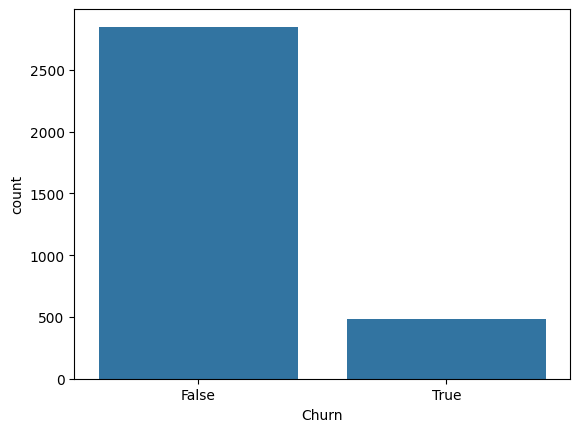

In [6]:
# Use the sns.countplot() function to plot the feature "Churn" (argument x="Churn") directly on the data df

########## FILL IN YOUR SOLUTION HERE ########## 

sns.countplot(x="Churn", data=df);

The chart above vividly illustrates the **imbalance** in our target variable. 

### Mapping (encoding) the categorical variable

In order for the class variable to be in machine-readable form and ready to be used by ML models, it needs to be encoded in a numerical format. `LabelEncoder` from `sklearn` can be used to encode target labels with value between `0` and `n_classes-1`. **This transformer should be used to encode ONLY target values (y variable), and not the input features in X** (in which case, we can use One Hot Encoding or other ways of encoding). 

Read more about [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) and [Transforming the prediction variable(y)](https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets)

In [7]:
# Task: Convert the categorical values within y into numbers using the LabelEncoder() from sklearn
# The values will be converted from True / False to integers 1 and 0.
# 1. Instantiate a LabelEncoder object and store into a variable named "le"

########## FILL IN YOUR SOLUTION HERE ########## 

le = LabelEncoder()

# 2. The .fit_transform() function takes a categorical column and converts/maps it into numerical values.
# Call the .fit_transform() function from the "le" LabelEncoder variable created above passing the y data 
# Assign the returned encoded labels back to y to overwrite its entries. 
# Display the updated entries of y; have they changed?  

########## FILL IN YOUR SOLUTION HERE ########## 

y = le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])

### Train-Test Split (Holdout validation)

Training and testing a classification model on the same dataset is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data (poor generalisation). To use different datasets for training and testing, we need to split our dataset into two disjoint sets: train and test (Holdout method).

Use `sklearn`’s `train_test_split()` function to randomly split the data into train and test sets (visit the [train_test_split documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and the  [model cross-validation documentation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)). Typically, 20% test size seems reasonable enough for checking the performance of models.

- **Note: it’s good practice to split the train and test sets before doing any feature engineering and/or scaling to avoid data leakage!!**


In [8]:
# Use the train_test_split() function and pass the following arguments: 
# (1) the X matrix (2) the y vector (3) test_size=0.2 (4) random_state=1 (for result reproducibility)
# Store the results into the new variables X_train, X_test, y_train, y_test (simultaneously)


########## FILL IN YOUR SOLUTION HERE ########## 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


# Print the shape of X_train, X_test, y_train, y_test 
# Do the X and y variables for train and test respectively match? 

########## FILL IN YOUR SOLUTION HERE ########## 

print('Shape of x_train and y_train: ', X_train.shape, y_train.shape)
print('Shape of x_test and y_test: ',   X_test.shape,  y_test.shape)

Shape of x_train and y_train:  (2666, 16) (2666,)
Shape of x_test and y_test:  (667, 16) (667,)


### Scaling 


/var/folders/5g/fcbnwv7s16344nm4h15fl6rc0000gn/T/ipykernel_3500/3751535469.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


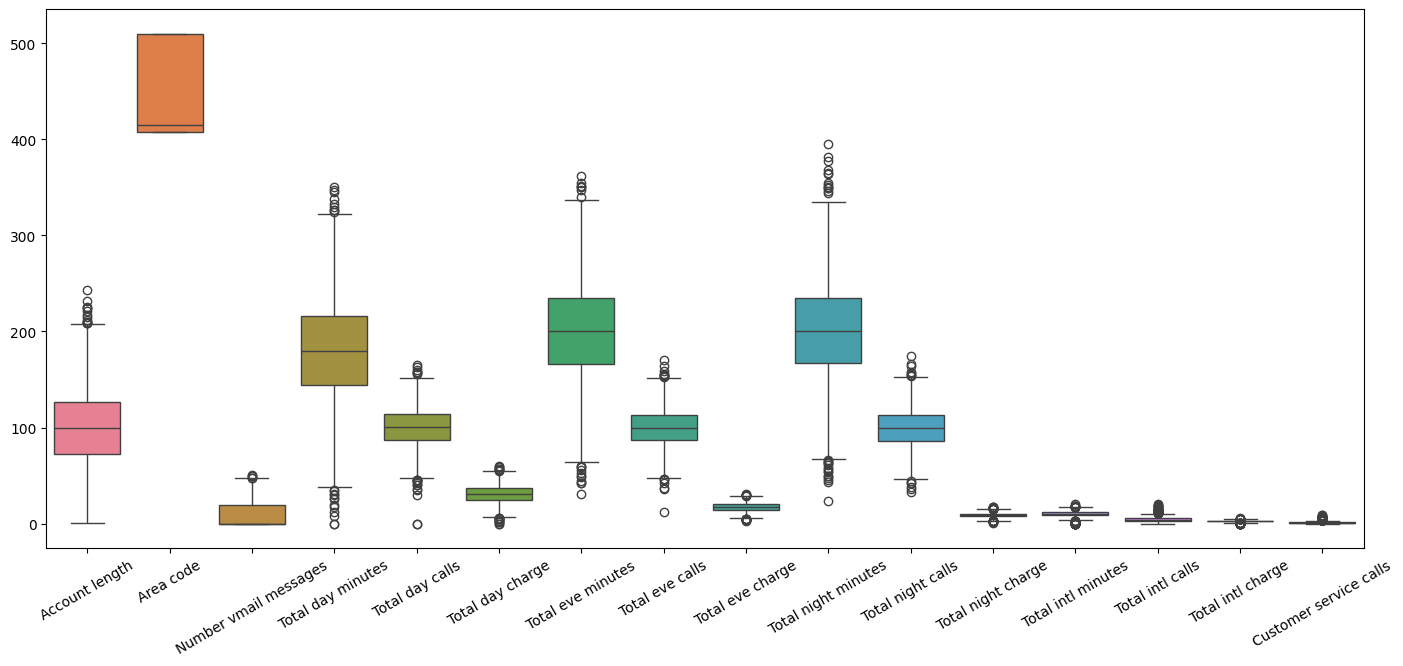

In [9]:
# What do you observe when running the code below? 

plt.figure(figsize=(17,7))
ax = sns.boxplot(data= X_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show();

Prior to feeding our data to any other supervised or unsupervised learning technique, we always need to **scale** our data. For this, we will subtract the mean from each variable and divide it by its standard deviation. All of this can be done with `StandardScaler`.

**NOTE: We should only fit the scaler on the train set and use it to transform the test set to avoid data leakage.** 

In [10]:
# Instantiate the StandardScaler() from sklearn and store into a variable named "scaler" 

########## FILL IN YOUR SOLUTION HERE ########## 

scaler = StandardScaler()  


# Fit the scaler on the X_train data and transform the data - Use the scaler.fit_transform() on the X_train set 
# (alternatively, we can .fit() and .transform() in two separate steps). Remember, we fit ONLY on the train data. 
# Assign the result back to the variable X_train

########## FILL IN YOUR SOLUTION HERE ########## 


X_train = scaler.fit_transform(X_train)


# Transform (do not fit!) the test data (X_test) using the fitted scaler named "scaler". Use the scaler.transform()
# function on the X_test. Assign the result back to the variable X_test

########## FILL IN YOUR SOLUTION HERE ########## 


X_test  = scaler.transform(X_test)

In [11]:
# Note: scaling in sklearn converts the X_train into a numpy array (stripping away all column/index names) 
# We may often need to maintain the names of the columns for further analysis e.g. to further use in PCA 
# It is therefore useful to leverage the functionality provided by pandas (casting/creating DFs)
# There are various ways to accomplish this at this scaling step, one of which could be the following: 

X_train = pd.DataFrame(X_train, columns=scaler.feature_names_in_) 
X_test  = pd.DataFrame(X_test,  columns=scaler.feature_names_in_) 
X_test.columns

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')

/var/folders/5g/fcbnwv7s16344nm4h15fl6rc0000gn/T/ipykernel_3500/1087460275.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


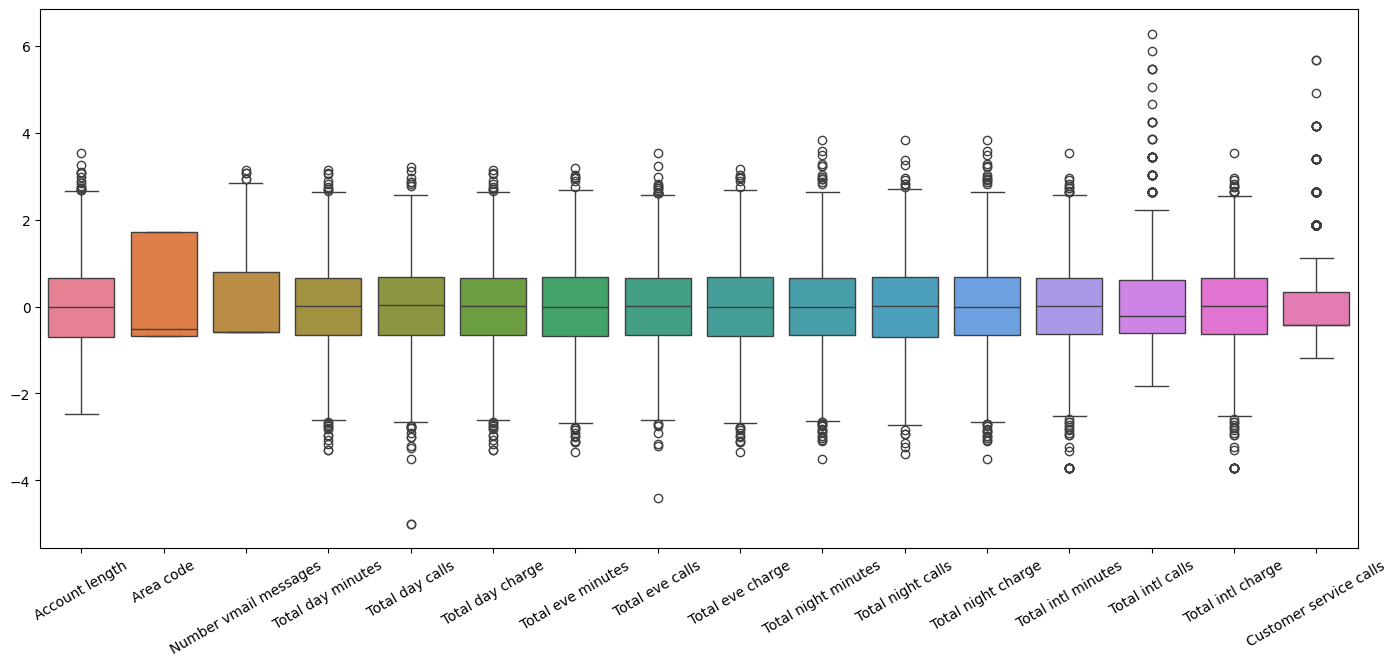

In [12]:
# What do you observe when running the code below after scaling? 

plt.figure(figsize=(17,7))
ax = sns.boxplot(data= X_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show();

## Supervised Learning - Classification

For every classification model built with `scikit-learn`, we will follow four main steps:

1. Building the classification model (using either default, pre-defined or optimized parameters)
2. Training the model
3. Testing the model
4. Performance evaluation using various metrics.

### K Nearest Neighbors


Neighbors-based classification is a type of *instance-based learning* or *lazy learning*: it does not attempt to construct a general internal model (using a boundary), but simply stores instances of the training data and defers the decision to generalize until a new test instance in encountered. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.


#### Train, optimise and test a KNN algorithm with scikit-learn

`scikit-learn` implements two different nearest neighbors classifiers: 
- `KNeighborsClassifier` implements learning based on the nearest neighbors of each query point, where is an integer value specified by the user. 
- `RadiusNeighborsClassifier` implements learning based on the number of neighbors within a fixed radius of each training point, where is a floating-point value specified by the user. 
The k-neighbors classification in `KNeighborsClassifier` is the most commonly used technique.

The `KNeighborsClassifier` object allows you to set the value of K using the `n_neighbors` parameter (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). 


#### KNN using the pre-processed data (without PCA)

In [13]:
# Step 1 - Instantiate the KNeighborsClassifier() classifier using its default parameters 
# (default parameters: do *NOT* pass any parameter values in KNeighborsClassifier()) 
# Assign the result into a new variable named "knn"

########## FILL IN YOUR SOLUTION HERE ########## 


knn = KNeighborsClassifier()

# Step 2 - Fit the knn model to the training set (use knn.fit())
# Pass as function arguments the train matrix X_train and the class vec y_train 
# No need to assign it into a new variable

########## FILL IN YOUR SOLUTION HERE ########## 


knn.fit(X_train, y_train)

# Step 3 - Predict the test data using the knn model (use knn.predict())
# Pass as argument ONLY the test matrix X_test
# Save the prediction output into a new variable "y_pred"

########## FILL IN YOUR SOLUTION HERE ########## 


y_pred = knn.predict(X_test)

# Step 4 - Print the final overall accuracy for the test set using metrics.accuracy_score()
# Pass as parameters the actual values from y_test and the predicted values from y_pred 

########## FILL IN YOUR SOLUTION HERE ########## 

print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred))

Test set accuracy:  0.8875562218890555


In [14]:
# Print the confusion_matrix for the test set using metrics.confusion_matrix()
# Pass as parameters the actual values from y_test and the predicted values from y_pred 

########## FILL IN YOUR SOLUTION HERE ########## 


print(metrics.confusion_matrix(y_test, y_pred))

[[563   6]
 [ 69  29]]


In [15]:
# Print the classification_report for the test set using metrics.classification_report()
# Pass as parameters the actual values from y_test and the predicted values from y_pred 

########## FILL IN YOUR SOLUTION HERE ########## 


print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       569
           1       0.83      0.30      0.44        98

    accuracy                           0.89       667
   macro avg       0.86      0.64      0.69       667
weighted avg       0.88      0.89      0.86       667



### Dimensionality reduction with PCA

Most real-world datasets have many features, sometimes, many thousands of them. Each of them can be considered as a dimension in the space of data points. Consequently, more often than not, we deal with high-dimensional datasets, where entire visualization is quite hard.

To look at a dataset as a whole, we need to decrease the number of dimensions used in visualization without losing much information about the data. This task is called *dimensionality reduction* and is an example of an *unsupervised learning* problem because we need to derive new, low-dimensional features from the data itself, without any supervised input.

One of the well-known dimensionality reduction methods is *Principal Component Analysis* (PCA). Its limitation is that it is a *linear* algorithm that implies certain restrictions on the data. There are also many non-linear methods, collectively called *Manifold Learning*. One of the best-known of them is *t-SNE*.

#### Loading the PCA library

In [16]:
from sklearn.decomposition import PCA

#### Instantiating a PCA object

In scikit-learn, PCA is implemented as a transformer object that learns `n` components in its `fit()` method, and can be used on new data to project it on these components. More information on how to use the `pca()` function and its parameters can be found at http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

_Remember: Prior to feeding our data to PCA or any other supervised or unsupervised learning technique, we need to **scale** our data. For this, we will subtract the mean from each variable and divide it by its standard deviation. All of this can be done with `StandardScaler` or `MinMaxScaler()`._

In [17]:
# Initialise/instantiate PCA() into a new variable named "pca"

########## FILL IN YOUR SOLUTION HERE ########## 

pca = PCA()

In [18]:
# Create a feature name for each Principal Component (such as PC1, PC2, ...) up to the number of current dimensions
# and store in a list for further use 

PCs = ['PC'+str(i+1) for i in range(X_train.shape[1])]
print(PCs)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16']


#### PCA scores

The values of the Principal Components (scores) can be computed by the `fit_transform()` function (alternatively, `fit()` followed by `transform()` in two separate steps) . This function returns a matrix with the principal components, where the first column in the matrix contains the first principal component, the second column the second component, and so on.

In [19]:
# Create the PCA scores matrix for the training data: remember we are fitting ONLY on the training set 
# Call from the pca object that was created above the .fit_transform() function passing the scaled X_train data. 
# (alternatively, instead of .fit_transform(), we can do .fit() and .transform() in two separate steps)
# Save the result of the .fit_transform() into a new variable "X_train_scores"

########## FILL IN YOUR SOLUTION HERE ########## 

X_train_scores = pca.fit_transform(X_train)

In [20]:
# As with previous examples, .fit_transform() converts the data into a numpy array. Therefore, we can convert/cast  
# it back into a DataFrame using the pandas.DataFrame() constructor as follows. The purpose here is to have the 
# column names equal to the new Principal Components 

X_train_scores = pd.DataFrame(X_train_scores, columns = PCs)    

In [21]:
# Check the dimensionality of the PCA scores and preview X_train_scores 

########## FILL IN YOUR SOLUTION HERE ##########  

print(X_train_scores.shape)
X_train_scores.head()

(2666, 16)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-0.336252,-1.370841,0.418047,0.030683,1.340902,1.012578,0.999959,1.136643,-0.506458,0.483859,-1.300514,-0.948201,0.000593,0.001087,-0.000675,0.000327
1,-0.905710,0.820275,2.087768,1.008790,0.238382,0.879862,-0.087900,-0.018995,0.415584,-0.374424,0.767131,1.323130,-0.002427,0.000788,-0.000333,0.000105
2,-2.102539,2.573087,0.316484,-0.477230,-1.192031,-0.028654,0.370401,0.347843,0.276430,-0.718469,0.951741,0.218997,0.002279,-0.001453,-0.000032,0.000273
3,-0.640980,0.624284,0.224143,-0.092001,0.446076,-0.481047,-0.085196,0.100717,-0.286915,-1.231223,0.518365,0.606546,-0.002384,-0.000611,-0.000306,0.000184
4,3.271839,-2.113262,-0.887570,1.114753,-0.539106,-1.916531,-1.834027,-0.789085,-0.124607,1.204592,-1.470655,-0.493905,0.004110,0.001060,0.000049,0.000193


In [22]:
# Can you get the PC scores for the test data as above? 
# NOTE we are fitting ONLY on the training set and only transforming on the test set 

######### FILL IN YOUR SOLUTION HERE ########## 

X_test_scores = pca.transform(X_test)

# As with previous examples, .transform() converts the data into a numpy array. Therefore, we can convert/cast  
# it back into a DataFrame using the pandas.DataFrame constructor. Can you do that for the  X_test_scores ? 
 

X_test_scores = pd.DataFrame(X_test_scores, columns = PCs)    

# Check the dimensionality of the PCA scores and preview X_test_scores 


print(X_test_scores.shape)
X_test_scores.head()

(667, 16)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,1.229771,-0.843815,-0.280857,0.532251,0.452299,0.253929,-0.069561,0.114770,-1.153098,-0.284247,0.468139,0.297457,0.001374,-0.000629,-0.000132,0.000193
1,0.348455,0.730617,-1.084796,-2.322185,1.964841,-0.323347,1.104431,1.193107,1.073858,-0.607509,0.277253,0.739270,0.002639,0.000730,0.000094,-0.000211
2,-0.546599,-2.484211,0.452292,2.731822,1.229344,0.086776,0.149238,0.199597,-0.308618,-0.244188,-1.126376,-2.500549,0.000470,-0.000758,0.000319,0.000135
3,0.143233,1.593673,1.515550,-0.997624,-0.003757,-0.725842,0.088837,-0.346495,-0.043453,-0.452389,-0.645124,0.828371,-0.003342,0.000508,-0.000807,0.000162
4,1.001447,-2.095396,-1.339721,0.687868,0.816126,-0.047446,1.568517,-1.531297,-1.657009,-0.082204,-0.651251,-0.016630,0.001503,0.000975,0.000170,0.000037


#### Explained variance and cumulative variance

But how much information have we lost? We can figure this out by looking at the explained and cumulative variance. The explained variance gives us the proportion of variance explained by each successive Principal Component. The cumulative variance is obtained by adding the successive proportions of explained variance to obtain the total sum.

In [23]:
# Calculate the explained variance
exp_var = [i*100 for i in pca.explained_variance_ratio_]

# Calculate the cumulative variance
cum_var = np.cumsum(pca.explained_variance_ratio_*100)

# Combine both in a data frame
pca_var = pd.DataFrame(data={'exp_var': exp_var, 'cum_var': cum_var}, index=PCs)
pca_var

,exp_var,cum_var
PC1,1.288467e+01,12.884670
PC2,1.248821e+01,25.372877
PC3,1.238728e+01,37.760159
PC4,1.234317e+01,50.103334
PC5,6.763820e+00,56.867153
PC6,6.513943e+00,63.381097
PC7,6.451520e+00,69.832616
PC8,6.205955e+00,76.038571
PC9,6.124215e+00,82.162786
PC10,6.070661e+00,88.233447


We use this information to determine a threshold on how many Principal Components we should ideally keep. 

We can also plot the explained variance using a barplot with seaborn:

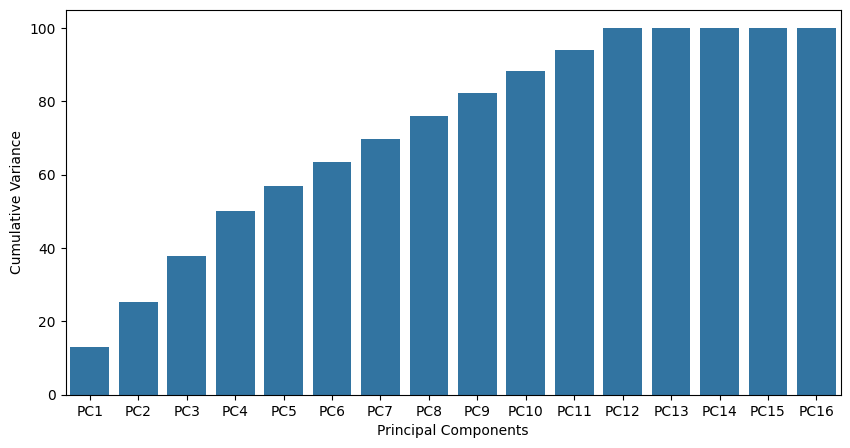

In [24]:
# Plot the cumulative variance per PC using a barplot

fig = plt.figure(figsize=(10,5))
ax = sns.barplot(x=pca_var.index, y='cum_var', data=pca_var)
ax.set(xlabel='Principal Components', ylabel='Cumulative Variance')
plt.show()

### PCA for plotting & EDA 
#### Plot the PCA scores in a scatterplot (enhanced with a color for each different class of Churn) 

In [25]:
# Join the class label to be used in the scatterplot for ease when using seaborn

X_train_scores_enhanced = X_train_scores.join(df['Churn'])
X_train_scores_enhanced.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,Churn
0,-0.336252,-1.370841,0.418047,0.030683,1.340902,1.012578,0.999959,1.136643,-0.506458,0.483859,-1.300514,-0.948201,0.000593,0.001087,-0.000675,0.000327,False
1,-0.905710,0.820275,2.087768,1.008790,0.238382,0.879862,-0.087900,-0.018995,0.415584,-0.374424,0.767131,1.323130,-0.002427,0.000788,-0.000333,0.000105,False
2,-2.102539,2.573087,0.316484,-0.477230,-1.192031,-0.028654,0.370401,0.347843,0.276430,-0.718469,0.951741,0.218997,0.002279,-0.001453,-0.000032,0.000273,False
3,-0.640980,0.624284,0.224143,-0.092001,0.446076,-0.481047,-0.085196,0.100717,-0.286915,-1.231223,0.518365,0.606546,-0.002384,-0.000611,-0.000306,0.000184,False
4,3.271839,-2.113262,-0.887570,1.114753,-0.539106,-1.916531,-1.834027,-0.789085,-0.124607,1.204592,-1.470655,-0.493905,0.004110,0.001060,0.000049,0.000193,False


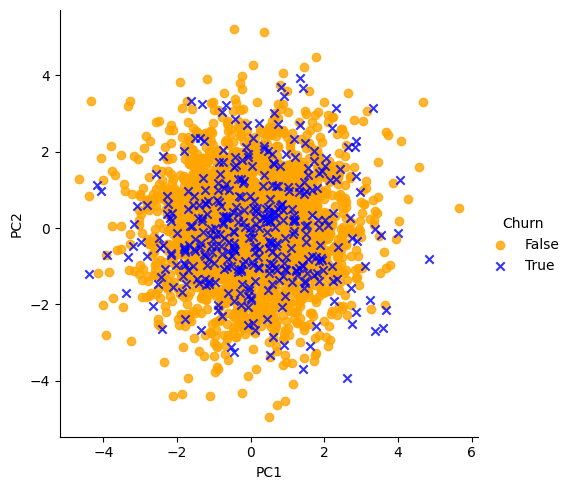

In [26]:
# Create an enhanced scatterplot of the first two Principal Components
# Remember, we are using scores (!) rather than df as input at this stage

ax = sns.lmplot(x='PC1',y='PC2', data= X_train_scores_enhanced, hue='Churn', 
                markers=['o', 'x'], palette=['orange', 'blue'], fit_reg=False)

plt.show()

### PCA for Supervised Learning 

Passing the PCA scores into a classifier such as KNN 

#### KNN using the pre-processed data with PCA

Can you repeat KNN only this time round using the pre-processed data from PCA? 


In [27]:
# Decide on the cut-off for the number of Principal Components you would like to keep
# e.g. how many PCs do we need to reach e.g. 95% or 99% of the variance? 
# Check the cumulative variance table/plot above to decide on the number of PCs 
# Filter the columns of X_train_scores and X_test_scores accordingly using .iloc[]
# Conduct a sanity check on the dimensionality of the matrices 

########## FILL IN YOUR SOLUTION HERE ########## 


X_train_scores = X_train_scores.iloc[:, :13]
X_test_scores  = X_test_scores.iloc[:, :13]

X_test_scores.shape

(667, 13)

In [28]:
# Step 1 - Instantiate the KNeighborsClassifier() classifier using its default parameters 
# default parameters: do *NOT* pass any parameter values in KNeighborsClassifier()
# Assign the result into a new variable named "knn"

########## FILL IN YOUR SOLUTION HERE ########## 


knn = KNeighborsClassifier()

# Step 2 - Fit the knn model to the training set (use knn.fit())
# Pass as function arguments the train matrix X_train_scores and the class vec y_train 
# No need to assign it into a new variable

########## FILL IN YOUR SOLUTION HERE ########## 


knn.fit(X_train_scores, y_train)

# Step 3 - Predict the test data using the knn model (use knn.predict())
# Pass as argument only the test matrix X_test_scores
# Save the prediction output into a new variable "y_pred"

########## FILL IN YOUR SOLUTION HERE ########## 


y_pred = knn.predict(X_test_scores)

# Step 4 - Print the final overall accuracy for the test set using metrics.accuracy_score()
# Pass as parameters the actual values from y_test and the predicted values from y_pred 

########## FILL IN YOUR SOLUTION HERE ########## 

print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred))

Test set accuracy:  0.8875562218890555


In [29]:
# Print the confusion_matrix for the test set using metrics.confusion_matrix()
# Pass as parameters the actual values from y_test and the predicted values from y_pred 

########## FILL IN YOUR SOLUTION HERE ########## 


print(metrics.confusion_matrix(y_test, y_pred))

[[563   6]
 [ 69  29]]


In [30]:
# Print the classification_report for the test set using metrics.classification_report()
# Pass as parameters the actual values from y_test and the predicted values from y_pred 

########## FILL IN YOUR SOLUTION HERE ########## 


print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       569
           1       0.83      0.30      0.44        98

    accuracy                           0.89       667
   macro avg       0.86      0.64      0.69       667
weighted avg       0.88      0.89      0.86       667



##### What do we observe? 

We observe that we accomplish a similar accuracy to the one we saw before while using less features in our modelling 